In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import os
import math
from google.colab import drive
import numpy as np
from sklearn.svm import SVC
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import cv2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, fbeta_score, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import Normalizer
import tensorflow as tf
import time
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_dir = "/content/drive/MyDrive/part2images"
os.listdir(root_dir)


['test', 'train', 'val']

In [ ]:
classes = {"normal": 0, "benign" : 1, "malignant":2}

In [ ]:
train_set = os.path.join(root_dir,"train")
validation_set = os.path.join(root_dir,"val")
test_set = os.path.join(root_dir,"test")

In [ ]:
x_train = []
y_train = []
for j in os.listdir(train_set):
  image_path = os.path.join(train_set,j)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgArray = img.reshape(224,224,1)
  x_train.append(imgArray)
  if "normal" in j:
    y_train.append(0)
  elif "benign" in j:
    y_train.append(1)
  elif "malignant" in j:
    y_train.append(2)

In [ ]:
x_val = []
y_val = []
for j in os.listdir(validation_set):
  image_path = os.path.join(validation_set,j)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgArray = img.reshape(224,224,1)
  x_val.append(imgArray)
  if "normal" in j:
    y_val.append(0)
  elif "benign" in j:
    y_val.append(1)
  elif "malignant" in j:
    y_val.append(2)

In [ ]:
x_test = []
y_test = []

for j in os.listdir(test_set):
  image_path = os.path.join(test_set,j)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgArray = img.reshape(224,224,1)
  x_test.append(imgArray)
  if "normal" in j:
    y_test.append(0)
  elif "benign" in j:
    y_test.append(1)
  elif "malignant" in j:
    y_test.append(2)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape, y_train.shape

((5085, 224, 224, 1), (5085,))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D


cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 1,)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(3,activation='sigmoid')
])

cnn_model.compile(optimizer = tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train, num_classes = 3, dtype ="uint8")


y_train.shape

(5085, 3)

In [ ]:
y_val = to_categorical(y_val, num_classes = 3, dtype ="uint8")

In [ ]:
y_test = to_categorical(y_test, num_classes = 3, dtype ="uint8")

In [ ]:
history = cnn_model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
159/159 [==============================] - 4s 23ms/step - loss: 126.6981 - accuracy: 0.5412 - val_loss: 0.3933 - val_accuracy: 0.8727
Epoch 2/15
159/159 [==============================] - 3s 22ms/step - loss: 0.4141 - accuracy: 0.8448 - val_loss: 0.1325 - val_accuracy: 0.9879
Epoch 3/15
159/159 [==============================] - 3s 22ms/step - loss: 0.2052 - accuracy: 0.9294 - val_loss: 0.0584 - val_accuracy: 0.9879
Epoch 4/15
159/159 [==============================] - 3s 22ms/step - loss: 0.0960 - accuracy: 0.9731 - val_loss: 0.0786 - val_accuracy: 0.9879
Epoch 5/15
159/159 [==============================] - 3s 22ms/step - loss: 0.0468 - accuracy: 0.9904 - val_loss: 0.0695 - val_accuracy: 0.9879
Epoch 6/15
159/159 [==============================] - 3s 22ms/step - loss: 0.0327 - accuracy: 0.9935 - val_loss: 0.0747 - val_accuracy: 0.9818
Epoch 7/15
159/159 [==============================] - 3s 22ms/step - loss: 0.0219 - accuracy: 0.9963 - val_loss: 0.0974 - val_accuracy: 0.99

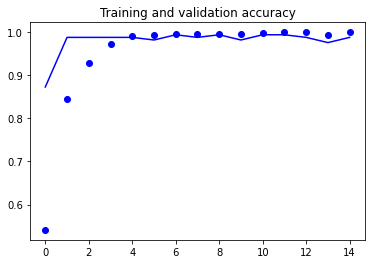

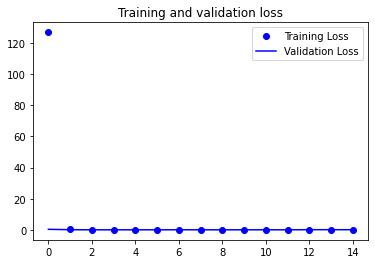

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
predict = cnn_model.predict(x_test)

6/6 [==============================] - 0s 8ms/step


In [ ]:
y_pred = predict

In [ ]:
cnn_model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.0276 - accuracy: 0.9939


[0.02757222205400467, 0.9939393997192383]

In [ ]:

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Benign', 'Malignant'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

print(confusion_matrix)

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

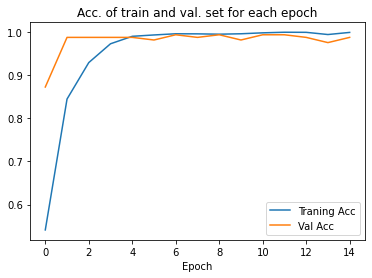

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.title("Acc. of train and val. set for each epoch")
plt.legend(["Traning Acc", "Val Acc"])
plt.show()



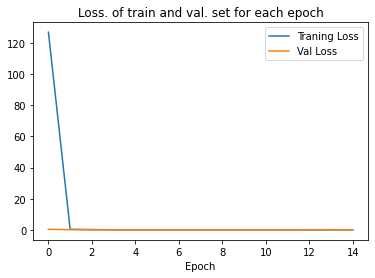

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.title("Loss. of train and val. set for each epoch")
plt.legend(["Traning Loss", "Val Loss"])
plt.show()

BINARY CLASSIFICATION

In [ ]:
x_train_tumor = []
y_train_tumor = []
for j in os.listdir(train_set):
  image_path = os.path.join(train_set,j)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgArray = img.reshape((224,224))
  if "benign" in j:
    y_train_tumor.append(0)
    x_train_tumor.append(imgArray)
  elif "malignant" in j:
    y_train_tumor.append(1)
    x_train_tumor.append(imgArray)

In [ ]:
x_val_tumor = []
y_val_tumor = []
for j in os.listdir(validation_set):
  image_path = os.path.join(validation_set,j)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgArray = img.reshape((224,224))
  if "benign" in j:
    y_val_tumor.append(0)
    x_val_tumor.append(imgArray)
  elif "malignant" in j:
    y_val_tumor.append(1)
    x_val_tumor.append(imgArray)
  

In [ ]:
x_test_tumor = []
y_test_tumor = []
for j in os.listdir(test_set):
  image_path = os.path.join(test_set,j)
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgArray = img.reshape((224,224))
  if "benign" in j:
    y_test_tumor.append(0)
    x_test_tumor.append(imgArray)
  elif "malignant" in j:
    y_test_tumor.append(1)
    x_test_tumor.append(imgArray)


In [ ]:
x_train_tumor = np.array(x_train_tumor)
y_train_tumor = np.array(y_train_tumor)

x_val_tumor = np.array(x_val_tumor)
y_val_tumor = np.array(y_val_tumor)

x_test_tumor = np.array(x_test_tumor)
y_test_tumor = np.array(y_test_tumor)



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D


cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 1,)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

cnn_model.compile(optimizer = tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(x_train_tumor, y_train_tumor, epochs=10, validation_data=(x_val_tumor, y_val_tumor))

Epoch 1/10
101/101 [==============================] - 3s 23ms/step - loss: 33.4901 - accuracy: 0.7893 - val_loss: 0.0633 - val_accuracy: 0.9709
Epoch 2/10
101/101 [==============================] - 2s 21ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0314 - val_accuracy: 0.9806
Epoch 3/10
101/101 [==============================] - 2s 21ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 4/10
101/101 [==============================] - 2s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 5/10
101/101 [==============================] - 2s 22ms/step - loss: 5.1526e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/10
101/101 [==============================] - 2s 22ms/step - loss: 3.0108e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/10
101/101 [==============================] - 2s 21ms/step - loss: 2.0747e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_acc

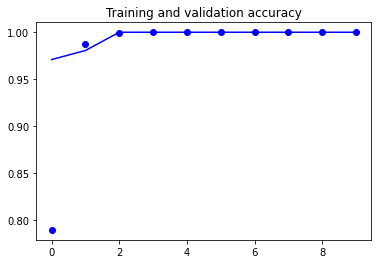

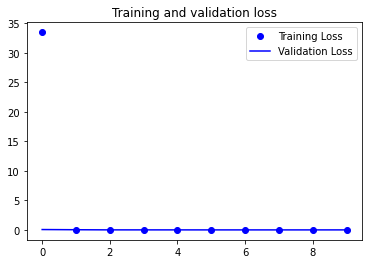

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
predict = cnn_model.predict(x_test_tumor)

4/4 [==============================] - 0s 8ms/step


In [ ]:
cnn_model.evaluate(x_test_tumor, y_test_tumor)

4/4 [==============================] - 0s 8ms/step - loss: 4.5413e-05 - accuracy: 1.0000


[4.5412634790409356e-05, 1.0]

In [ ]:

# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...
y_pred_tumor = np.round(predict)



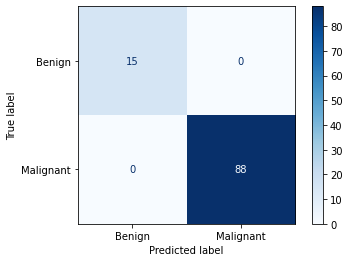

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test_tumor, y_pred_tumor)

labels = ["Benign", "Malignant"]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
print(classification_report(y_test_tumor, y_pred_tumor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        88

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



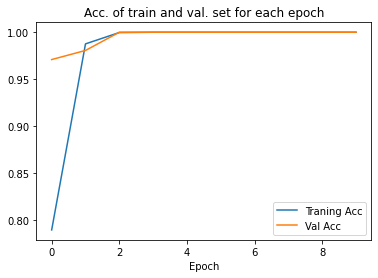

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.title("Acc. of train and val. set for each epoch")
plt.legend(["Traning Acc", "Val Acc"])
plt.show()

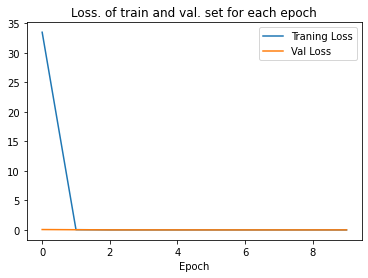

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.title("Loss. of train and val. set for each epoch")
plt.legend(["Traning Loss", "Val Loss"])
plt.show()